# **LOAD AND IDENTIFYING DATA**

In [ ]:
# Identifying data

import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('heart_2022.csv')
print('Dataset before cleaning:\n', df.head())

# Load a dataset of your choice and identify missing values.
print("\nMissing values in column:")
print(df.isnull().sum())


# Display basic information about the dataset
print("=== Dataset Overview ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}\n")

print("=== Data Types and Non-Null Counts ===")
print(df.info())

Dataset before cleaning:
      State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         8.0

# **HANDLING MISSING DATA**

In [ ]:
# Handling missing numerical data
df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].mean(), inplace=True)
df['MentalHealthDays'].fillna(df['MentalHealthDays'].median(), inplace=True)
df['SleepHours'].fillna(df['SleepHours'].mean(), inplace=True)
df['HeightInMeters'].fillna(df['HeightInMeters'].median(), inplace=True)
df['WeightInKilograms'].fillna(df['WeightInKilograms'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

# Handling missing categorical data
df['GeneralHealth'].fillna('Unknown', inplace=True)
df['LastCheckupTime'].fillna('Unknown', inplace=True)


df.dropna(inplace=True)

print("Dataset after cleaning:\n", df)

# cek missing values
print("\nMissing values in column:")
print(df.isnull().sum())

<ipython-input-69-c2c226c8127b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhysicalHealthDays'].fillna(df['PhysicalHealthDays'].mean(), inplace=True)
<ipython-input-69-c2c226c8127b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

Dataset after cleaning:
             State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
342       Alabama  Female     Very good                 4.0               0.0   
343       Alabama    Male     Very good                 0.0               0.0   
345       Alabama    Male     Very good                 0.0               0.0   
346       Alabama  Female          Fair                 5.0               0.0   
347       Alabama  Female          Good                 3.0              15.0   
...           ...     ...           ...                 ...               ...   
425259  Wisconsin    Male     Excellent                 0.0               0.0   
425260  Wisconsin    Male     Excellent                 0.0               0.0   
425263  Wisconsin    Male          Good                 0.0               0.0   
425265  Wisconsin  Female     Very good                 0.0               2.0   
425266  Wisconsin    Male       Unknown                 1.0              30.0   

  

# **CLEAN DATA (STANDARIZE) & HAPUS DATA**

In [ ]:
# Daftar kolom Yes/No yang perlu dikonversi menjadi 0 dan 1
binary_columns = [
    'PhysicalActivites', 'HadHeartAttack', 'HadAngina',
    'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
    'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing',
    'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
    'DifficultyErrands', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan', 'PhysicalActivities', 'BlindOrVisionDifficulty'
]

# Mengonversi kolom Yes/No menjadi 1 dan 0
def standardize_binary(column):
    return column.replace({"Yes": 1, "No": 0})

for col in binary_columns:
    if col in df.columns:
        df[col] = standardize_binary(df[col])

# Daftar mapping langsung untuk konversi kolom lainnya
mappings = {
    'Sex': {'Male': 0, 'Female': 1},
    'GeneralHealth': {'Excellent': 1, 'Very good': 2, 'Good': 3, 'Fair': 4, 'Poor': 5},
    'LastCheckupTime': {
        "Within past year (anytime less than 12 months ago)": 1,
        "Within past 2 years (1 year but less than 2 years ago)": 2,
        "Within past 5 years (2 years but less than 5 years ago)": 3,
        "5 or more years ago": 4
    },
    'RemovedTeeth': {
        "1 to 5": 1,
        "6 or more, but not all": 2,
        "All": 3,
        "None of them": 4
    },
    'HadDiabetes': {
        "Yes": 1,
        "Yes, but only during pregnancy (female)": 1,
        "No": 0,
        "No, pre-diabetes or borderline diabetes": 0
    },
    'SmokerStatus': {
        "Current smoker - now smokes every day": 1,
        "Current smoker - now smokes some days": 1,
        "Former smoker": 1,
        "Never smoked": 0
    },
    'ECigaretteUsage': {
        "Never used e-cigarettes in my entire life": 1,
        "Use them every day": 1,
        "Use them some days": 1,
        "Not at all (right now)": 0
    },
    'RaceEthnicityCategory': {
        "White only, Non-Hispanic": 1,
        "Black only, Non-Hispanic": 2,
        "Other race only, Non-Hispanic": 3,
        "Multiracial, Non-Hispanic": 4,
        "Hispanic": 5
    },
    'AgeCategory': {
        "Age 18 to 24": 1, "Age 25 to 29": 2, "Age 30 to 34": 3, "Age 35 to 39": 4,
        "Age 40 to 44": 5, "Age 45 to 49": 6, "Age 50 to 54": 7, "Age 55 to 59": 8,
        "Age 60 to 64": 9, "Age 65 to 69": 10, "Age 70 to 74": 11, "Age 75 to 79": 12,
        "Age 80 or older": 13
    },
    'TetanusLast10Tdap': {
        "Yes, received Tdap": 1,
        "Yes, received tetanus shot, but not Tdap": 1,
        "Yes, received tetanus shot but not sure what type": 1,
        "No, did not receive any tetanus shot in the past 10 years": 0
    },
    'CovidPos': {
        "Yes": 1,
        "No": 0,
        "Tested positive using home test without a health professional": 2
    }
}

# Mengonversi kolom berdasarkan mapping
for col, mapping in mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Membersihkan nilai SleepHours (mengganti nilai >24 dengan NaN)
df['SleepHours'] = df['SleepHours'].apply(lambda x: np.nan if x > 24 else x)

# Menghapus kolom yang tidak diperlukan
columns_to_drop = ['State']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])



print("Dataset After Cleaning :", df.head())
# Menampilkan display tabel
from IPython.display import display
display(df.head(10))

# Menyimpan dataset yang telah dibersihkan
df.to_csv('heart_2022_cleaned.csv', index=False)


<ipython-input-70-1a183c5e91c4>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return column.replace({"Yes": 1, "No": 0})


Dataset After Cleaning :      Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
342    1            2.0                 4.0               0.0   
343    0            2.0                 0.0               0.0   
345    0            2.0                 0.0               0.0   
346    1            4.0                 5.0               0.0   
347    1            3.0                 3.0              15.0   

     LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
342              1.0                   1         9.0             4   
343              1.0                   1         6.0             4   
345              1.0                   0         8.0             2   
346              1.0                   1         9.0             4   
347              1.0                   1         5.0             1   

     HadHeartAttack  HadAngina  ...  HeightInMeters  WeightInKilograms    BMI  \
342               0          0  ...            1.60              71.67  27.99   
3

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,1,2.0,4.0,0.0,1.0,1,9.0,4,0,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
343,0,2.0,0.0,0.0,1.0,1,6.0,4,0,0,...,1.78,95.25,30.13,0,0,1,1,1,0,0
345,0,2.0,0.0,0.0,1.0,0,8.0,2,0,0,...,1.85,108.86,31.66,1,0,0,1,0,0,1
346,1,4.0,5.0,0.0,1.0,1,9.0,4,0,0,...,1.70,90.72,31.32,0,0,1,1,0,0,1
347,1,3.0,3.0,15.0,1.0,1,5.0,1,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0
349,0,3.0,0.0,0.0,1.0,1,7.0,4,0,0,...,1.85,120.20,34.96,1,1,1,0,1,0,0
350,1,3.0,3.0,0.0,1.0,1,8.0,2,0,0,...,1.63,88.00,33.30,0,0,1,1,0,0,0
352,0,4.0,5.0,0.0,1.0,1,8.0,1,1,1,...,1.75,74.84,24.37,0,1,1,1,0,0,1
354,0,3.0,2.0,0.0,4.0,0,6.0,4,0,0,...,1.70,78.02,26.94,0,0,0,0,0,0,1
357,1,2.0,0.0,0.0,1.0,1,7.0,4,0,0,...,1.68,63.50,22.60,0,0,1,1,0,0,0


## **VISUALISASI DATA**

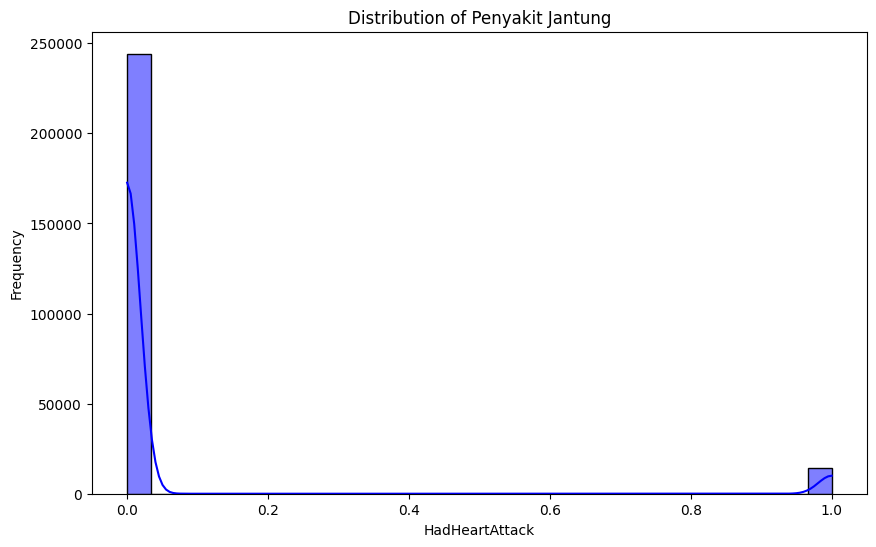

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi Penyakit Jantung
plt.figure(figsize=(10, 6))
sns.histplot(df['HadHeartAttack'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Penyakit Jantung')
plt.xlabel('HadHeartAttack')
plt.ylabel('Frequency')
plt.show()

<ipython-input-72-f75af9a22560>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['HadHeartAttack'], y=df['SleepHours'], palette='Set2')


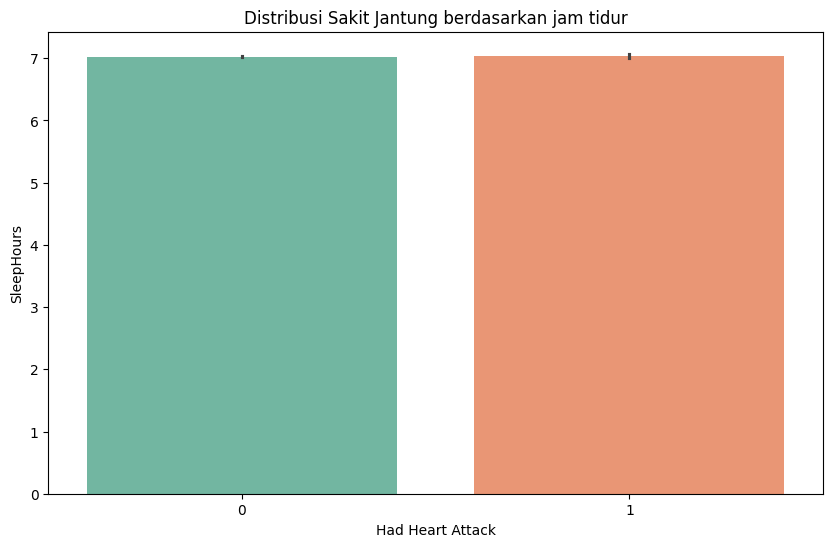

In [ ]:
# Hubungan SleepHours dan HeartAttack
plt.figure(figsize=(10, 6))
sns.barplot(x=df['HadHeartAttack'], y=df['SleepHours'], palette='Set2')
plt.title('Distribusi Sakit Jantung berdasarkan jam tidur')
plt.xlabel('Had Heart Attack')
plt.ylabel('SleepHours')
plt.show()

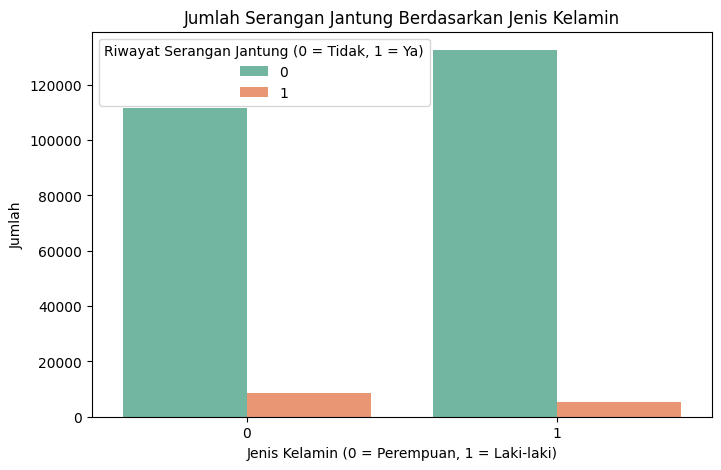

In [ ]:
# Jumlah pasien dengan riwayat serangan jantung berdasarkan jenis kelamin
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sex'], hue=df['HadHeartAttack'], palette='Set2')
plt.title('Jumlah Serangan Jantung Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-laki)')
plt.ylabel('Jumlah')
plt.legend(title='Riwayat Serangan Jantung (0 = Tidak, 1 = Ya)')
plt.show()

# **MENCARI FITUR PENTING**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql.functions import col

In [ ]:
# 1. Membuat sesi Spark
spark = SparkSession.builder.appName("HeartAttackFeatureImportance").getOrCreate()

# 2. Membaca dataset
data_path = "heart_2022_cleaned.csv"  # Ganti dengan path file Anda
df = spark.read.csv(data_path, header=True, inferSchema=True)

# 3. Memeriksa nilai null pada dataset
print("Jumlah Nilai Null per Kolom:")
df.select([col(c).isNull().alias(c) for c in df.columns]).show()

# 4. Menghapus baris dengan nilai null pada kolom fitur dan target
df = df.dropna(subset=[col for col in df.columns if col != 'HadHeartAttack'])  # Kecuali kolom target

# 5. Menggunakan StringIndexer untuk mengonversi kolom kategorikal menjadi numerik
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_indexed") for col in df.columns if df.schema[col].dataType == "StringType"]

# 6. Mengonversi kolom target menjadi label numerik
indexer_target = StringIndexer(inputCol="HadHeartAttack", outputCol="label")

# 7. Menggabungkan semua kolom fitur ke dalam VectorAssembler
feature_columns = [col for col in df.columns if col not in ["HadHeartAttack", "label"]]  # Mengabaikan kolom target
final_feature_columns = [f"{col}_indexed" if df.schema[col].dataType == "StringType" else col for col in feature_columns]
assembler = VectorAssembler(inputCols=final_feature_columns, outputCol="features")

# 8. Pipeline untuk preprocessing
pipeline = Pipeline(stages=indexers + [indexer_target, assembler])

# 9. Menjalankan pipeline untuk preprocessing
df_transformed = pipeline.fit(df).transform(df)

# Cek apakah kolom 'features' sudah ada setelah preprocessing
df_transformed.select("features", "label").show(5)

# 10. Latih RandomForestClassifier
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, seed=42)

# Pastikan model dilatih pada dataset yang telah diproses
model = rf.fit(df_transformed)

# 11. Mendapatkan fitur penting
feature_importances = model.featureImportances
importance_dict = {feature: score for feature, score in zip(final_feature_columns, feature_importances)}

# 12. Menampilkan fitur paling penting
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Top 10 Fitur yang Mempengaruhi HadHeartAttack:")
for feature, importance in sorted_importances[:10]:
    print(f"{feature}: {importance}")

# 13. Menutup sesi Spark
spark.stop()


Jumlah Nilai Null per Kolom:
+-----+-------------+------------------+----------------+---------------+------------------+----------+------------+--------------+---------+---------+---------+-------------+-------+---------------------+----------------+------------+-----------+-------------------+-----------------------+-----------------------+-----------------+-------------------------+-----------------+------------+---------------+---------+---------------------+-----------+--------------+-----------------+-----+---------------+----------+------------+-------------+-----------------+----------------+--------+
|  Sex|GeneralHealth|PhysicalHealthDays|MentalHealthDays|LastCheckupTime|PhysicalActivities|SleepHours|RemovedTeeth|HadHeartAttack|HadAngina|HadStroke|HadAsthma|HadSkinCancer|HadCOPD|HadDepressiveDisorder|HadKidneyDisease|HadArthritis|HadDiabetes|DeafOrHardOfHearing|BlindOrVisionDifficulty|DifficultyConcentrating|DifficultyWalking|DifficultyDressingBathing|DifficultyErrands|Smoker

# **RANDOM FOREST CLASSIFICATION**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:

spark = SparkSession.builder.appName("HeartDiseaseClassification").getOrCreate()

data_path = "heart_2022_cleaned.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Pilih fitur yang relevan dan target
features = [
    'HadAngina', 'HadStroke', 'GeneralHealth', 'SmokerStatus',
    'AlcoholDrinkers', 'AgeCategory', 'PhysicalHealthDays',
    'HadDiabetes', 'ChestScan', 'HadCOPD', 'DifficultyWalking', 'Sex'
]
target = 'HadHeartAttack'

# Ganti nilai null dengan nilai default (misalnya 0)
df = df.na.fill(0)

# Ubah nama kolom target dan pastikan tipe datanya numerik
df = df.withColumnRenamed(target, "label")
df = df.withColumn("label", col("label").cast("double"))

# Konversi semua fitur ke tipe numerik jika diperlukan
for feature in features:
    df = df.withColumn(feature, col(feature).cast("double"))

# Menggabungkan semua fitur menjadi satu kolom 'features' menggunakan VectorAssembler
assembler = VectorAssembler(inputCols=features, outputCol="features")

# Mengubah target menjadi numerik jika belum (asumsi target sudah numerik)
df = df.withColumnRenamed(target, "label")

# Membagi data menjadi training dan testing set
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Cek ukuran data training dan testing
print(f"Ukuran X_train: {train_data.count()} rows, {len(train_data.columns)} columns")
print(f"Ukuran X_test: {test_data.count()} rows, {len(test_data.columns)} columns")

Ukuran X_train: 206607 rows, 39 columns
Ukuran X_test: 51716 rows, 39 columns


In [ ]:
# Inisialisasi model RandomForest
rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100, seed=42)

# Membuat pipeline dengan assembler dan classifier
pipeline = Pipeline(stages=[assembler, rf])

# Melatih model menggunakan data training
model = pipeline.fit(train_data)

# Gunakan model yang telah dilatih untuk melakukan prediksi pada data testing
predictions = model.transform(test_data)

# Menampilkan beberapa prediksi
predictions.select("features", "label", "prediction").show(5)

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(12,[3,5,7,8,10],...|  0.0|       0.0|
|(12,[0,3,5,7],[1....|  1.0|       0.0|
|      (12,[5],[7.0])|  0.0|       0.0|
|(12,[5,7,8],[10.0...|  1.0|       0.0|
|(12,[5,8],[11.0,1...|  0.0|       0.0|
+--------------------+-----+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Melakukan prediksi pada test data
predictions = model.transform(test_data)

# Evaluasi model menggunakan akurasi
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Akurasi Model: {accuracy:.4f}")
print(f"Akurasi (Persen): {accuracy * 100:.2f}%")

Akurasi Model: 0.9472
Akurasi (Persen): 94.72%


In [ ]:
# Menampilkan beberapa hasil prediksi
print("Hasil Prediksi:")
predictions.select('HadAngina', 'HadStroke', 'GeneralHealth', 'SmokerStatus',
    'AlcoholDrinkers', 'AgeCategory', 'PhysicalHealthDays',
    'HadDiabetes', 'ChestScan', 'HadCOPD', 'DifficultyWalking', 'Sex', "label", "prediction", "probability").show(10, truncate=False)



Hasil Prediksi:
+---------+---------+-------------+------------+---------------+-----------+------------------+-----------+---------+-------+-----------------+---+-----+----------+-----------------------------------------+
|HadAngina|HadStroke|GeneralHealth|SmokerStatus|AlcoholDrinkers|AgeCategory|PhysicalHealthDays|HadDiabetes|ChestScan|HadCOPD|DifficultyWalking|Sex|label|prediction|probability                              |
+---------+---------+-------------+------------+---------------+-----------+------------------+-----------+---------+-------+-----------------+---+-----+----------+-----------------------------------------+
|0.0      |0.0      |0.0          |1.0         |0.0            |13.0       |0.0               |1.0        |1.0      |0.0    |1.0              |0.0|0.0  |0.0       |[0.9520777166277494,0.047922283372250504]|
|1.0      |0.0      |0.0          |1.0         |0.0            |13.0       |0.0               |1.0        |0.0      |0.0    |0.0              |0.0|1.0  |0.0

# **VISUALISASI**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession

<ipython-input-102-fd0bdacbcb0e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_pandas, palette='viridis')


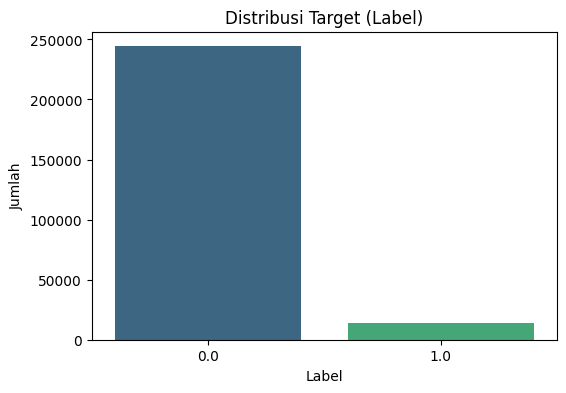

In [ ]:
from pyspark.sql import SparkSession

# Inisialisasi SparkSession
spark = SparkSession.builder.appName("NewSession").getOrCreate()


# Konversi Spark DataFrame ke Pandas
df_pandas = df.select("label").toPandas()

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_pandas, palette='viridis')
plt.title('Distribusi Target (Label)')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()


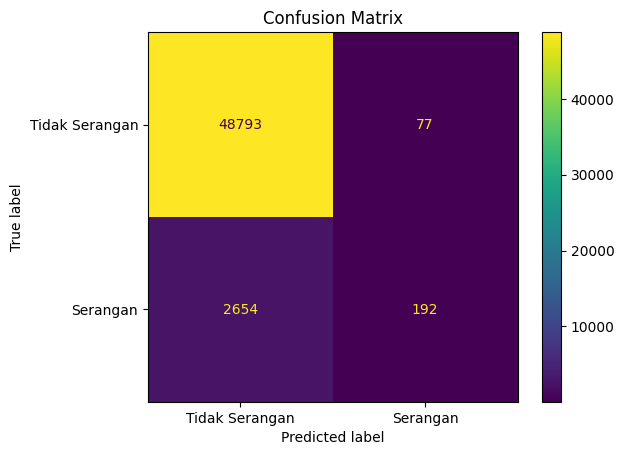

In [ ]:
# Konversi hasil prediksi ke Pandas
predictions_pandas = predictions.select("label", "prediction").toPandas()

# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(predictions_pandas['label'], predictions_pandas['prediction'])
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Serangan', 'Serangan']).plot(cmap="viridis")
plt.title('Confusion Matrix')
plt.show()


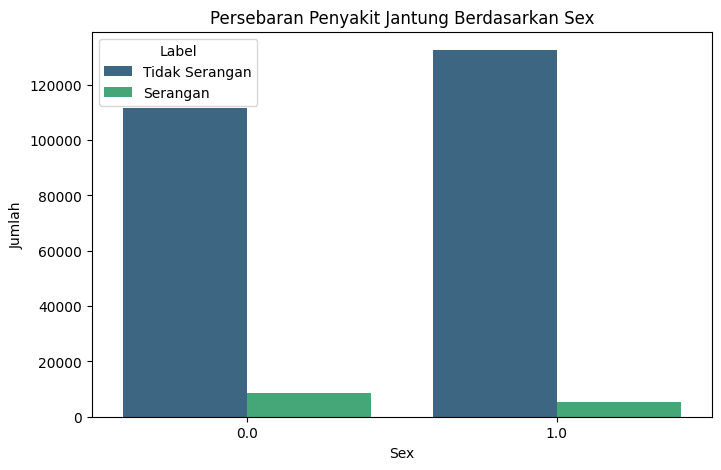

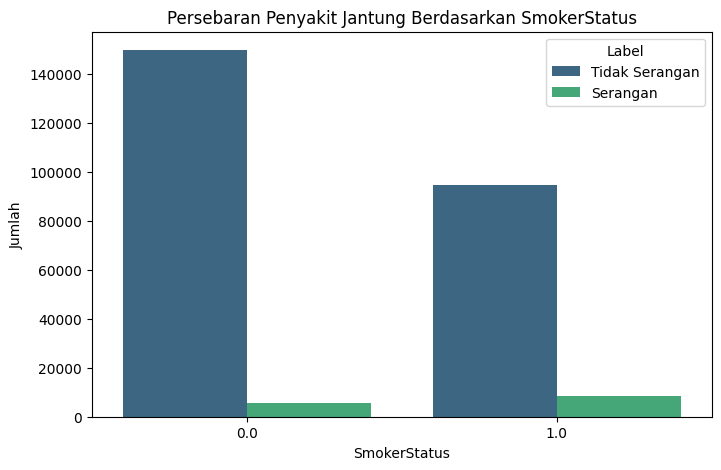

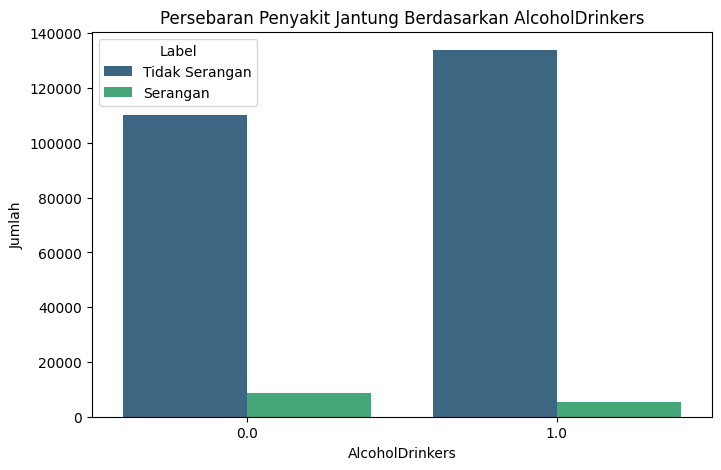

In [ ]:
# Konversi DataFrame ke Pandas
df_pandas = df.select(features + ['label']).toPandas()

# List fitur kategorikal untuk analisis
categorical_features = ['Sex', 'SmokerStatus', 'AlcoholDrinkers']

# Plot countplot untuk setiap fitur kategorikal
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_pandas, x=feature, hue='label', palette='viridis')
    plt.title(f'Persebaran Penyakit Jantung Berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Jumlah')
    plt.legend(title='Label', labels=['Tidak Serangan', 'Serangan'])
    plt.show()


<ipython-input-113-e8c3e476eabe>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = df_pandas.groupby([f"{feature}_bucket", "label"]).size().unstack(fill_value=0)


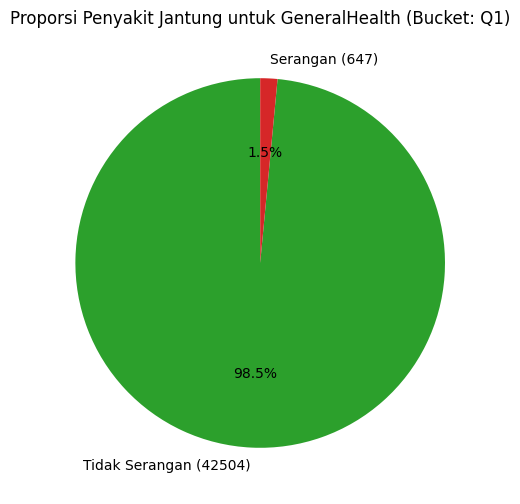

<ipython-input-113-e8c3e476eabe>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = df_pandas.groupby([f"{feature}_bucket", "label"]).size().unstack(fill_value=0)


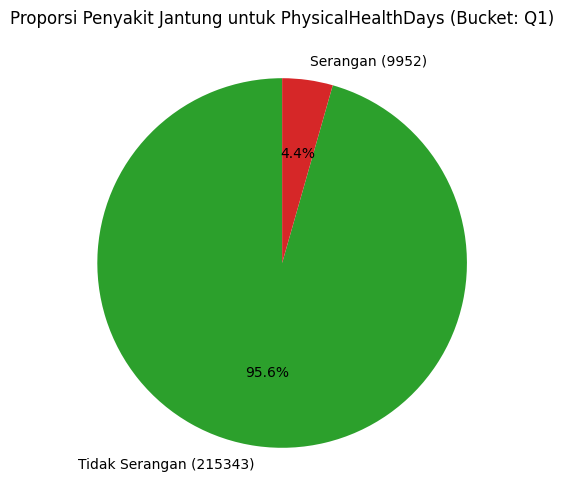

<ipython-input-113-e8c3e476eabe>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = df_pandas.groupby([f"{feature}_bucket", "label"]).size().unstack(fill_value=0)


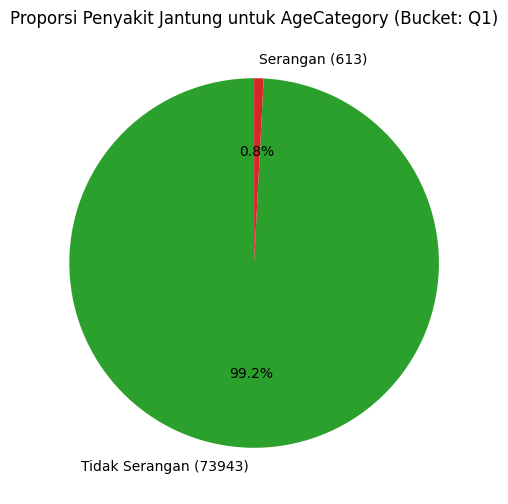

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi DataFrame Spark ke Pandas
df_pandas = df.select(*numerical_features, 'label').toPandas()

# Membuat bucket untuk fitur numerik dan memplot pie chart
for feature in numerical_features:
    # Membuat kategori (buckets) untuk fitur numerik
    df_pandas[f"{feature}_bucket"] = pd.cut(df_pandas[feature], bins=3, labels=[f"Q{i+1}" for i in range(3)])

    # Hitung distribusi berdasarkan bucket dan label
    distribution = df_pandas.groupby([f"{feature}_bucket", "label"]).size().unstack(fill_value=0)
    distribution_percentage = distribution.div(distribution.sum(axis=1), axis=0) * 100

    # Menampilkan hanya satu bucket (misalnya "Q1") untuk mengurangi jumlah output
    for bucket in distribution_percentage.index[:1]:  # Hanya ambil 1 bucket pertama
        plt.figure(figsize=(6, 6))
        plt.pie(
            distribution_percentage.loc[bucket],
            labels=[f"Tidak Serangan ({int(distribution.loc[bucket, 0])})", f"Serangan ({int(distribution.loc[bucket, 1])})"],
            autopct='%1.1f%%',
            startangle=90,
            colors=['#2ca02c', '#d62728']
        )
        plt.title(f"Proporsi Penyakit Jantung untuk {feature} (Bucket: {bucket})")
        plt.show()


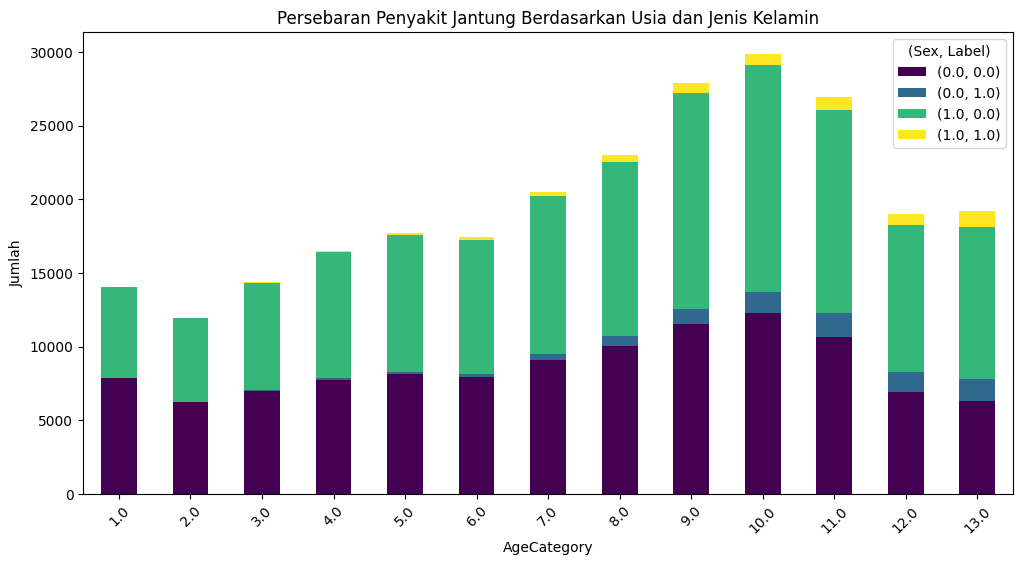

In [ ]:
# Plot stacked bar chart berdasarkan AgeCategory dan Sex
age_sex_df = df_pandas.groupby(['AgeCategory', 'Sex', 'label']).size().reset_index(name='count')

# Pivot untuk membuat stacked bar chart
pivot_df = age_sex_df.pivot_table(index='AgeCategory', columns=['Sex', 'label'], values='count', fill_value=0)

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Persebaran Penyakit Jantung Berdasarkan Usia dan Jenis Kelamin')
plt.xlabel('AgeCategory')
plt.ylabel('Jumlah')
plt.legend(title='(Sex, Label)', loc='upper right')
plt.xticks(rotation=45)
plt.show()


# **HYPERPARAMETER**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Membuat sesi Spark
spark = SparkSession.builder.appName("HeartDiseaseClassification").getOrCreate()

# Membaca dataset
data_path = "heart_2022_cleaned.csv"  # Ganti dengan path file Anda
df = spark.read.csv(data_path, header=True, inferSchema=True)

df = df.na.drop()

# Pilih fitur yang relevan dan target
features = [
    'HadAngina', 'HadStroke', 'GeneralHealth', 'SmokerStatus',
    'AlcoholDrinkers', 'AgeCategory', 'PhysicalHealthDays',
    'HadDiabetes', 'ChestScan', 'HadCOPD', 'DifficultyWalking', 'Sex'
]
target = 'HadHeartAttack'

# Menggabungkan semua fitur menjadi satu kolom 'features' menggunakan VectorAssembler
assembler = VectorAssembler(inputCols=features, outputCol="features")

# Mengubah target menjadi numerik jika belum (asumsi target sudah numerik)
df = df.withColumnRenamed(target, "label")

# Membagi data menjadi training dan testing set
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Menyiapkan VectorAssembler
train_data_transformed = assembler.transform(train_data)
test_data_transformed = assembler.transform(test_data)

# Inisialisasi DecisionTree
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")

# Menyiapkan evaluator untuk multiclass classification
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Membuat param grid untuk hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [5, 10, 15])   # Maximum depth of the tree
             .addGrid(dt.maxBins, [32, 64, 128])  # Number of bins
             .addGrid(dt.minInstancesPerNode, [1, 2, 5])  # Minimum instances per node
             .build())

# Menyiapkan CrossValidator untuk tuning hyperparameters
crossval = CrossValidator(estimator=dt,
                          evaluator=evaluator,
                          estimatorParamMaps=paramGrid,
                          numFolds=3)  # 3-fold cross-validation

# Melatih model dengan cross-validation
cvModel = crossval.fit(train_data_transformed)

# Menggunakan model yang terlatih untuk melakukan prediksi pada data testing
predictions = cvModel.transform(test_data_transformed)

# Menampilkan beberapa prediksi
predictions.select("features", "label", "prediction").show(5)

# Evaluasi model
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy of the Decision Tree model with best hyperparameters: {accuracy}")


+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(12,[2,3,5,8],[1....|    0|       0.0|
|(12,[2,3,4,5],[1....|    0|       0.0|
|(12,[2,4,5],[1.0,...|    0|       0.0|
|(12,[2,5],[1.0,9.0])|    0|       0.0|
|(12,[2,3,5,8],[1....|    0|       0.0|
+--------------------+-----+----------+
only showing top 5 rows

Accuracy of the Decision Tree model with best hyperparameters: 0.9466876028114252
